<a href="https://colab.research.google.com/github/khadija267/Computer-Vision/blob/main/CV_Coding_Challenge_for_Fatima_Fellowship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fatima Fellowship Quick Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. 

**Due date: 1 week**

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook to the submission link below. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw).

**Submission link**: https://airtable.com/shrXy3QKSsO2yALd3

# 1. Deep Learning for Vision

**Upside down detector**: Train a model to detect if images are upside down

* Pick a dataset of natural images (we suggest looking at datasets on the [Hugging Face Hub](https://huggingface.co/datasets?task_categories=task_categories:image-classification&sort=downloads))
* Synthetically turn some of images upside down. Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify image orientation until a reasonable accuracy is reached
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

# Load the mnist dataset

In [1]:
from mlxtend.data import mnist_data
X, y = mnist_data()

In [2]:
X.shape

(5000, 784)

In [3]:
y.shape

(5000,)

Visualize one image.

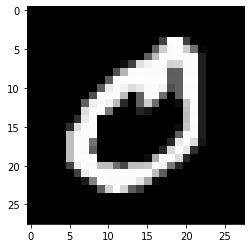

In [4]:
from matplotlib import pyplot
pyplot.imshow(X[1].reshape(28,28), cmap=pyplot.get_cmap('gray'))
pyplot.show()

Visualize one image after flipping.

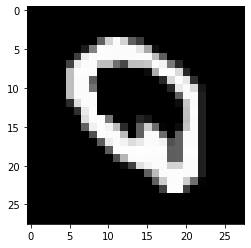

In [5]:
import cv2

flippedimage= cv2.flip(X[1].reshape(28,28), 0)
pyplot.imshow(flippedimage, cmap=pyplot.get_cmap('gray'))
pyplot.show()

We are going to split half of the data to be filpped upside down, and re-label the data to filpped and not-filpped.
Hence we have a balanced data set, then we can use the accuracy metric to evaluate our model.

In [6]:
import numpy as np
import random
random.seed(124)
flipped=X[np.random.choice(X.shape[0], int(X.shape[0]/2), replace=False), :]
not_flipped=X[np.random.choice(X.shape[0], int(X.shape[0]/2), replace=False), :]

In [7]:
flipped.shape


(2500, 784)

In [8]:
flipped_arr=[]
for ind in range(len(flipped)):
    flipped_arr.append((cv2.flip(flipped[ind].reshape(28,28), 0) ).flatten()  ) #print(ind)


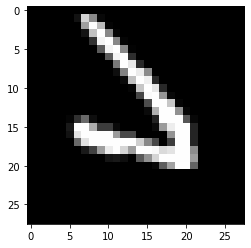

In [9]:
pyplot.imshow(flipped_arr[1].reshape(28,28), cmap=pyplot.get_cmap('gray'));


In [10]:
import pandas as pd

df_flipped=pd.DataFrame(flipped_arr)
df_flipped['labels']="flipped"
df_non_flipped=pd.DataFrame(not_flipped)
df_non_flipped['labels']="not_flipped"
df=pd.concat([df_flipped,df_non_flipped])


In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flipped
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flipped
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flipped
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flipped
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flipped


In [12]:
df.tail()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,labels
2495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_flipped
2496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_flipped
2497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_flipped
2498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_flipped
2499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,not_flipped


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 2499
Columns: 785 entries, 0 to labels
dtypes: float64(784), object(1)
memory usage: 30.0+ MB


## Encode the labels

In [14]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['labels']=le.fit_transform(df['labels'])

## Make train and test split

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'labels'], df["labels"], test_size=0.2, random_state=42)

In [16]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [17]:
X_train.shape

(4000, 784)

In [18]:
t=[]
tt=[]
for ind in range(len(X_train)):
    t.append(X_train[ind].reshape(28,28))
for ind in range(len(X_test)):
    
   tt.append(X_train[ind].reshape(28,28))




In [37]:
X_train=np.array(t)
X_test=np.array(tt)
y_test=np.array(y_test)
y_train=np.array(y_train)

In [20]:
X_train.shape

(4000, 28, 28)

## CNN Modeling

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import tensorflow as tf
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
#model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2704)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                173120    
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 173,410
Trainable params: 173,410
Non-trainable params: 0
________________________________________________

In [40]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [41]:
model.fit(x=X_train,y=y_train, epochs=10)

Epoch 1/10
125/125 [==============================] - 2s 11ms/step - loss: 9.5018 - accuracy: 0.8568
Epoch 2/10
125/125 [==============================] - 1s 11ms/step - loss: 0.4844 - accuracy: 0.9420
Epoch 3/10
125/125 [==============================] - 1s 11ms/step - loss: 0.3112 - accuracy: 0.9538
Epoch 4/10
125/125 [==============================] - 1s 11ms/step - loss: 0.2226 - accuracy: 0.9632
Epoch 5/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1652 - accuracy: 0.9660
Epoch 6/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1729 - accuracy: 0.9685
Epoch 7/10
125/125 [==============================] - 1s 11ms/step - loss: 0.1180 - accuracy: 0.9750
Epoch 8/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0465 - accuracy: 0.9833
Epoch 9/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0755 - accuracy: 0.9843
Epoch 10/10
125/125 [==============================] - 1s 11ms/step - loss: 0.0667 - accura

In [42]:
y_predict_prob = model.predict(X_test)
y_predict = y_predict_prob.argmax(axis=-1)

In [43]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_test, y_predict)
conf_mx

array([[300, 200],
       [325, 175]])

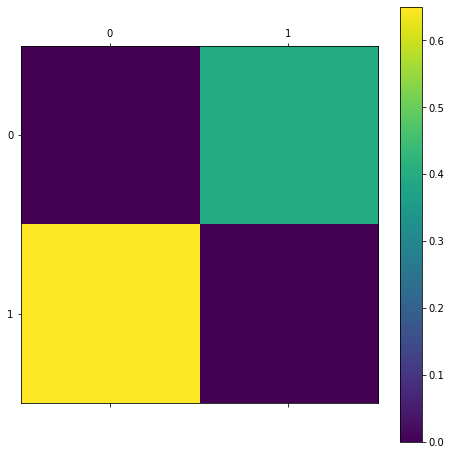

In [46]:

import matplotlib.pyplot as plt

def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
# plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plot_confusion_matrix(norm_conf_mx)
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.48      0.60      0.53       500
           1       0.47      0.35      0.40       500

    accuracy                           0.48      1000
   macro avg       0.47      0.47      0.47      1000
weighted avg       0.47      0.47      0.47      1000



## Observe mis-classified images

0 1


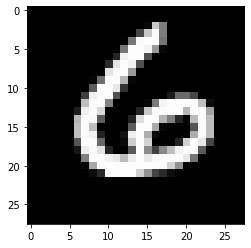

In [57]:
print(y_test[-1],y_predict[-1])
pyplot.imshow(X_test[-1], cmap=pyplot.get_cmap('gray'));


The true label is the image is flipped (represents the number 9), while the model sees it as it's non-flipped 6.

1 0


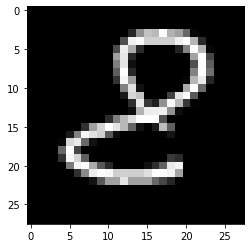

In [58]:
print(y_test[-2],y_predict[-2])
pyplot.imshow(X_test[-2], cmap=pyplot.get_cmap('gray'));


The true label is the image is not flipped, while the model sees it as it's flipped 8.

> I suggest to use image aumentation to widen the range of flipped images orientations, hence the model has extra examples that it can learn from.

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)